In [ ]:
#Source Code Steps For Installation

#1. Download Scipy Stack:
 sudo apt-get update
 sudo apt-get upgrade  
 sudo apt-get install python-numpy  python-matplotlib
        python-pandas python-sympy python-nose python-scipy
        
        
#2. Download opencv:

# install basic development environment
sudo apt-get install build-essential cmake pkg-config unzip
# install opencv dependencies. 
sudo apt-get install build-essential cmake git
sudo apt-get install pkg-config unzip ffmpeg  python-dev python3-dev python-numpy python3-numpy
sudo apt-get install libopencv-dev libgtk-3-dev libdc1394-22 libdc1394-22-dev libjpeg-dev libpng12-dev 
sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer0.10-dev 
sudo apt-get install libv4l-dev libtbb-dev libfaac-dev libmp3lame-dev libtheora-dev 
sudo apt-get install libvorbis-dev libxvidcore-dev v4l-utils libopencore-amrnb-dev libopencore-amrwb-dev
sudo apt-get install libjasper-dev libgstreamer-plugins-base0.10-dev
sudo apt-get install libjpeg8-dev libx264-dev libatlas-base-dev gfortran


# additional dependencies for java support
sudo apt-get install default-jdk ant


cd ~
wget -O opencv.zip https://github.com/Itseez/opencv/archive/3.1.0.zip
unzip opencv.zip

# compile opencv
tar xzvf opencv-2.4.9.13.tar.gz
cd opencv-2.4.9.13
mkdir build
cd build
cmake -D CMAKE_BUILD_TYPE=RELEASE -D INSTALL_C_EXAMPLES=ON  
        -D INSTALL_PYTHON_EXAMPLES=ON -D BUILD_EXAMPLES=ON
        -D WITH_QT=ON -D CMAKE_INSTALL_PREFIX=/usr/local
        -D WITH_OPENGL=ON -D WITH_V4L=ON -D WITH_CUDA=ON
        -D BUILD_NEW_PYTHON_SUPPORT=ON -D WITH_TBB=ON ..
        
        
make
sudo make install

sudo nano /etc/ld.so.conf.d/opencv.conf

#type this into the file
/usr/local/lib

sudo ldconfig
sudo nano /etc/bash.bashrc

PKG_CONFIG_PATH=$PKG_CONFIG_PATH:/usr/local/lib/pkgconfig
export PKG_CONFIG_PATH



cd ~/OpenCV-2.4.9.13/samples/cpp


#include <opencv2/opencv.hpp> //Include file for every supported OpenCV function


int main( int argc, char** argv ) {

    cv::Mat imgOriginal;

    imgOriginal = cv::imread("building.jpg"); 


    //cv::Mat img = cv::imread("building.jpg");
    if( imgOriginal.empty() ) return -1;
    cv::namedWindow( "Example1", cv::WINDOW_AUTOSIZE );
    cv::imshow( "Example1", imgOriginal );
    cv::waitKey( 0 );
    cv::destroyWindow( "Example1" );
    return 0;
}





 
#try the examples and make sure they work
 
 python ~/OpenCV-2.4.6/samples/python2/turing.py
#Link for people that are having problems with the different versions of Ubuntu: 
#http://answers.opencv.org/question/18226/opencv-java-build-error-in-ubuntu-1304/

In [ ]:
//tut1_dispImage.cpp

#include <opencv2/opencv.hpp> //Include file for every supported OpenCV function
using namespace cv;
	
int main( int argc, char** argv ) {

	cv::Mat img = cv::imread(argv[1],-1);
	if( img.empty() )
        return -1;
	cv::namedWindow( "Example1", cv::WINDOW_AUTOSIZE );
	cv::imshow( "Example1", img );
	cv::waitKey( 0 );
	cv::destroyWindow( "Example1" );
	return 0;
}

In [ ]:
When you compile the code using:
    g++ tut1.cpp -o tut1 `pkg-config opencv --cflags --libs`

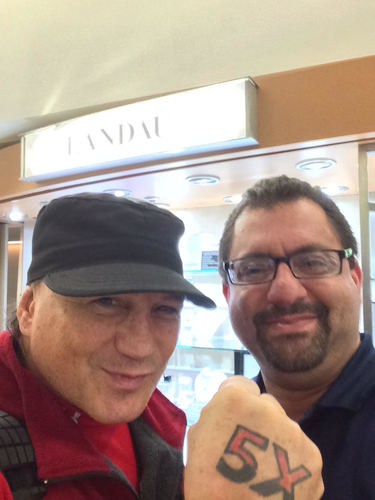

In [2]:
from IPython.display import Image
Image(filename='/home/cesco/youtube/vinny_paz.jpg')

In [ ]:
//tut2_dispVideo.cpp

#include "opencv2/opencv.hpp"

int main( int, char** ) {

	cv::namedWindow( "Video Footage", cv::WINDOW_AUTOSIZE );
	cv::VideoCapture cap(0);
	if(!cap.isOpened())
		return -1;

	
	cv::Mat frame;
	for(;;) 
	{
		cap >> frame;
		cv::imshow( "Video Footage", frame );
		if( cv::waitKey(33) >= 0 ) break;
	}
return 0;
}

In [ ]:
//tut3_dispVideoFromFile.cpp

#include <opencv2/opencv.hpp>

using namespace cv;

int main()
{
   VideoCapture cap("bleed_for_this_trailer.mp4");

if(!cap.isOpened())
        return -1;

    
    Mat frame;
    for(;;) 
    {
        cap >> frame;
        imshow( "Video Footage", frame );
        if( waitKey(33) >= 0 ) break;
    }
return 0;
}


In [7]:
from IPython.display import HTML
HTML("""
<video width="420" height="320" controls>
  <source src="bleed_for_this_trailer.mp4" type="video/mp4">
</video>
""")

you can also take these videos in black and white, instead of using color. You can do this by running the following code:

In [ ]:
//tut4_dispVideoCameraBW.cpp

#include "opencv2/opencv.hpp"

int main(int, char**)
{
    cv::VideoCapture cap(0); 
    if(!cap.isOpened())  
        return -1;

    cv::Mat original;
    cv::Mat gray;

    cv::namedWindow("Original",1);
    cv::namedWindow("Gray",1);
    
	for(;;)
    {
        cv::Mat frame;
        cap >> frame; 
        cv::cvtColor(frame, original, CV_BGR2HSV);
        cv::imshow("Original", frame);
		cv::imshow("Gray", original);
        if(cv::waitKey(30) >= 0) break;
    }

    return 0;
}

Now, that we know how to capture video live, or from a file, it will be useful to know how to also save it into a
file once we are done.  We do this by executing the following code:

In [ ]:
//tut5_dispVideoSave.cpp

#include "opencv2/opencv.hpp"

using namespace std;

int main()
{

    cv::VideoCapture cap(0); 
        if(!cap.isOpened())
        {
            cout << "Cannot seem to open the file" << endl;
            return -1;
        }

    int frame_width=   cap.get(CV_CAP_PROP_FRAME_WIDTH);
    int frame_height=  cap.get(CV_CAP_PROP_FRAME_HEIGHT);
    cv::VideoWriter video("output_video.avi",CV_FOURCC('M','J','P','G'),
                    10, cv::Size(frame_width,frame_height),true);

    for(;;)
        {
            cv::Mat frame;
            cap >> frame;
            video.write(frame);
            cv::imshow( "Video Frame", frame );
            char c = (char)cv::waitKey(27);
            if( c == 27 ) break;
        }
  return 0;
}
